In [1]:
#import the basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
# libraries for SVM 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
#import the dataset 
df = pd.read_csv('anemiaData.csv')
df.head() 

,age,residence,highest_education,wealth_index,births_last5_years,age_respondent_1st_birth,hemoglobin_altitude_smoking,mother_anemia_level,mosquito_bed_sleeping,residing_husband_partner,fever_two_weeks,hemoglobin_altitude,child_anemia_level,iron_pills
0,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,Living with her,No,114,Not anemic,No
1,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,Living with her,No,119,Not anemic,No
2,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,Living with her,No,102,Mild,Yes
3,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,Living with her,No,113,Not anemic,Yes
4,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,Living with her,No,109,Mild,No


In [3]:
#dimensions of the data 
df.shape

(10182, 14)

### Since a SVM model requires all of our variables to be numerical in nature, we need to convert these features into numerical before we can proceed.

##

### In this section, we will be converting all our categorical data into numeric data 

In [4]:
df['age'] = df['age'].apply(lambda x: sum(int(i) for i in x.split('-')) / 2 if isinstance(x, str) else x)

In [5]:
le = LabelEncoder()


df['residence'] = le.fit_transform(df['residence'])
df['highest_education'] = le.fit_transform(df['highest_education'])
df['wealth_index'] = le.fit_transform(df['wealth_index'])
df['mother_anemia_level'] = le.fit_transform(df['mother_anemia_level'])
df['mosquito_bed_sleeping'] = le.fit_transform(df['mosquito_bed_sleeping'])
df['residing_husband_partner'] = le.fit_transform(df['residing_husband_partner'])
df['fever_two_weeks'] = le.fit_transform(df['fever_two_weeks'])
df['iron_pills'] = le.fit_transform(df['iron_pills'])
df['child_anemia_level'] = le.fit_transform(df['child_anemia_level'])

In [6]:
df.head(20)

,age,residence,highest_education,wealth_index,births_last5_years,age_respondent_1st_birth,hemoglobin_altitude_smoking,mother_anemia_level,mosquito_bed_sleeping,residing_husband_partner,fever_two_weeks,hemoglobin_altitude,child_anemia_level,iron_pills
0,27.0,1,3,4,1,25,95.0,1,1,0,1,114,2,1
1,32.0,1,0,4,1,30,113.0,0,1,0,1,119,2,1
2,37.0,1,3,4,2,32,121.0,2,1,0,1,102,0,2
3,22.0,1,3,4,1,19,108.0,1,1,0,1,113,2,2
4,27.0,1,0,4,1,24,116.0,0,1,0,1,109,0,1
5,22.0,1,0,4,2,19,118.0,0,1,0,1,96,1,2
6,22.0,1,0,4,2,19,118.0,0,1,0,1,111,2,1
7,27.0,1,0,4,2,22,134.0,2,1,0,1,117,2,1
8,27.0,1,3,4,2,22,95.0,1,1,0,1,96,1,2
9,27.0,1,3,4,2,22,95.0,1,1,0,1,106,0,2


### Our dataframe is now completely numeric, allowing us to start on our SVM model 

##

### We will first need to develop our train-test split 

In [7]:
# Define feature matrix X by selecting all predictors
X = df.drop('child_anemia_level', axis=1)  # This removes the response variable from the feature matrix
# Define your target vector y by selecting the response variable
y = df['child_anemia_level']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Now we can use X_train,test and y_train,test to test it 

In [8]:

# Prepare a pipeline to scale features
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Set up the parameter grid. In practice, you would expand this with a range of values.
param_grid = [
    {'svm__kernel': ['linear'], 'svm__C': [0.1, 1, 10]},
    {'svm__kernel': ['rbf'], 'svm__C': [0.1, 1, 10], 'svm__gamma': [0.01, 0.1, 1]},
    {'svm__kernel': ['poly'], 'svm__C': [0.1, 1, 10], 'svm__degree': [2, 3, 4]}
]

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       554
           1       1.00      1.00      1.00       804
           2       1.00      1.00      1.00       623
           3       1.00      0.95      0.97        56

    accuracy                           1.00      2037
   macro avg       1.00      0.99      0.99      2037
weighted avg       1.00      1.00      1.00      2037



### From our gridsearch, we can tell that for the different kernels, the precision,recall and f1-scores are actually quite similar and does not tell us which kernel is the best 
### Hence we will be conducting more in-depth analysis for each kernel to determine which is the most suitable kernel 

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

# Record the best scores and corresponding kernel
best_accuracy = 0
best_f1_score = 0
best_kernel = None

kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List the kernels you want to try
for kernel in kernels:
    # Create an SVM with the current kernel
    svm_model = make_pipeline(StandardScaler(), SVC(kernel=kernel))
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    
    # Calculate the accuracy and F1 score
    current_accuracy = accuracy_score(y_test, y_pred)
    current_f1_score = f1_score(y_test, y_pred, average='weighted')  
    print(f"Accuracy with the {kernel} kernel: {current_accuracy:.4f}")
    print(f"F1 score with the {kernel} kernel: {current_f1_score:.4f}")
    
    # Update the best scores and kernel if the current model is better
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_f1_score = current_f1_score
        best_kernel = kernel

print(f"The best kernel is {best_kernel} with an accuracy of {best_accuracy:.4f} and F1 score of {best_f1_score:.4f}")

Accuracy with the linear kernel: 0.9966
F1 score with the linear kernel: 0.9966
Accuracy with the poly kernel: 0.9298
F1 score with the poly kernel: 0.9301
Accuracy with the rbf kernel: 0.9597
F1 score with the rbf kernel: 0.9596
Accuracy with the sigmoid kernel: 0.8581
F1 score with the sigmoid kernel: 0.8585
The best kernel is linear with an accuracy of 0.9966 and F1 score of 0.9966


### From our data, we can tell that the kernel with the highest accuracy is the linear kernel, with an accuracy score of 0.9966, hence we will use a linear kernel in our model.

### We will now proceed to train our model

In [10]:
# as we had deducded 
kernel_to_use = 'linear'

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM with the selected kernel
svm_model = SVC(kernel=kernel_to_use)

# Create a pipeline that scales the data and then trains the model
pipeline = make_pipeline(StandardScaler(), SVC(kernel=kernel_to_use))

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate a full classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9966
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       554
           1       1.00      1.00      1.00       804
           2       1.00      1.00      1.00       623
           3       1.00      0.96      0.98        56

    accuracy                           1.00      2037
   macro avg       1.00      0.99      0.99      2037
weighted avg       1.00      1.00      1.00      2037



## Let us get a better understanding of these numbers and what they mean 
#### With a high accuracy score of 0.9966, this indicates our model correctly predicted the class accurately 99.66% of the time
#### From our precision scores, it is also evident that there were no false positives across all the classes, indicating a highly accurate model 
#### From our recall scores, we can tell that for mild and moderate anemia levels, there were no false negatives. However, there were a few false negatives for no anemia and severe anemia levels 
#### From our f1-score, we can also infer that across the anemia levels, our model has a good standard of precision and recall
###
## However, sometimes a near perfect metrics may sometimes imply that the training data is overfitted onto the model, hence we will now check if our model is indeed overfitted or not

Cross-validation scores: [0.99877225 0.99447514 0.99693063 0.99508901 0.99324739]


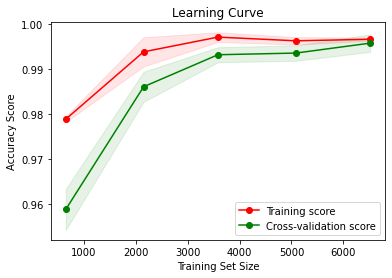

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Cross-validation scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')

# Learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0], cv=5)

# Mean and standard deviation of training and validation scores
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Plot learning curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

## We used a few stratergies to check for overfitting and ensure our model is not overfitted 
### 1. Cross Validation Scores - The cross validation scores across all subsets of the data was very high, thus implying that our model is stable and generalises well to the data 
#####
### 2.Learning curve - A learning curve plot shows the relationship between our accuracy score and training set size. The accuracy of our training score and cross validation score increases as more data is added. Therefore, implying that our model can capture the patterns in our data very well, as well as learn and improve its ability to generalise 

##
## What can we conclude: 
### 1. Our model is not overfitted. From our graph, it is obvious that the gap between the training and cross validation scores were quite narrow, implying that there is no overfitting 
### 2. Our model becomes more stable with more data. From our graph, the training and accuracy score increases as more data is added. 

# Hence we can use this model to make accurate predictions on a child's anemia level. 

## However, using our random forest tree, we were able to deduce the top 3 most important factors affecting a child's anemia level. The top 3 factors were: hemoglobin smoking levels, age of respondends and age. We will now create a seperate SVM model based on these 3 predictors and see if it is more accurate than our initial model which used all possible predictors 